In [1]:
# TensorFlow и tf.keras
import tensorflow as tf
from tensorflow import keras

# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt

import os
import skimage
import random

print(tf.__version__)

2.0.0-beta1


In [2]:
def load_data(data_directory):
    labels = []
    images = []
    images_directory = os.path.join(data_directory, "image")
    mask_directory = os.path.join(data_directory, "mask")
    file_names = os.listdir(images_directory)
    for f in file_names:
        images.append(skimage.data.imread(os.path.join(images_directory, f)))
        labels.append(skimage.data.imread(os.path.join(mask_directory, f)))
    for i in range(len(images)):
        images[i] = images[i]/255
        labels[i] = labels[i]/255
    #c = list(zip(images, labels))
    #random.shuffle(c)
    #images, labels = zip(*c)
    #labels= [int(i) for i in labels]
    
    images_train = np.array(images)
    labels_train = np.array(labels)
    
    return images_train, labels_train

ROOT_PATH = "C:/Users/Nikita/Desktop/T-Systems"
train_data_directory = os.path.join(ROOT_PATH, "TrainManyGray")

In [3]:
images_train, labels_train = load_data(train_data_directory)
images_train = images_train.reshape(-1, 256, 384, 1)
labels_train = labels_train.reshape(-1, 256, 384, 1)

In [4]:
new_model = keras.models.load_model("D:/T-Systems/Model06_save/Epoch-07-0.2478.h5")

W0718 20:54:14.022379 13244 deprecation.py:323] From c:\users\nikita\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
predictions = new_model.predict(images_train)

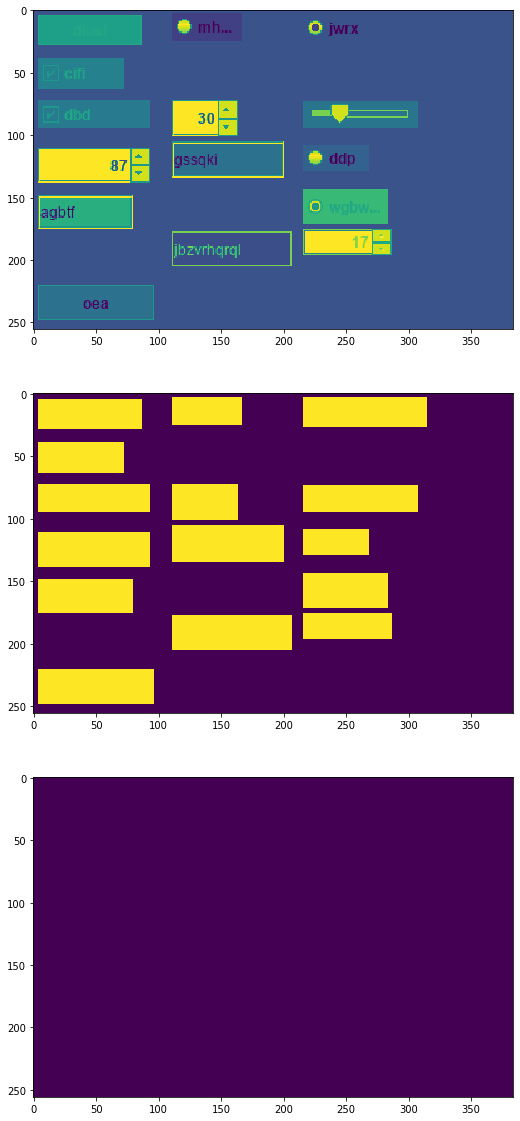

In [6]:
fig, axes = plt.subplots(3, 1)

i=random.randint(0, len(predictions))

axes[0].imshow(images_train[i].reshape((256, 384)))
axes[1].imshow(labels_train[i].reshape((256, 384)))
axes[2].imshow(predictions[i].reshape((256, 384)))

fig.set_figheight(20)
fig.set_figwidth(20)

plt.show()

In [ ]:

    a = []
    for j in range(len(predictions[i])):
        a.append(max(predictions[i][j]))
    print(max(a))